In [1]:
import os
os.chdir('C:\\Users\\91963\\Desktop\\Models_Worked\\Loan Prediction Analytics vidhya\Working')
print(os.getcwd())

C:\Users\91963\Desktop\Models_Worked\Loan Prediction Analytics vidhya\Working


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train_data.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      489
Female    112
Name: Gender, dtype: int64


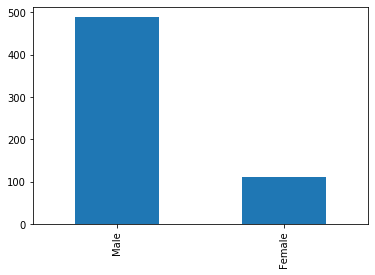

In [11]:
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot.bar()

Yes    398
No     213
Name: Married, dtype: int64


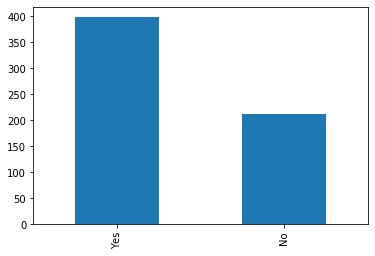

In [12]:
print(df['Married'].value_counts())
df['Married'].value_counts().plot.bar()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


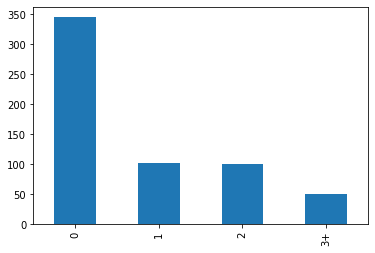

In [13]:
print(df['Dependents'].value_counts())
df['Dependents'].value_counts().plot.bar()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


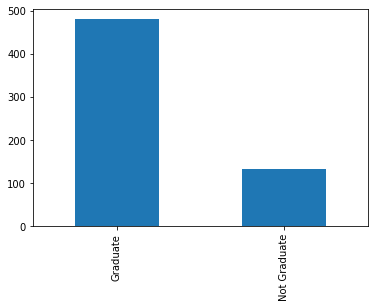

In [14]:
print(df['Education'].value_counts())
df['Education'].value_counts().plot.bar()

No     500
Yes     82
Name: Self_Employed, dtype: int64


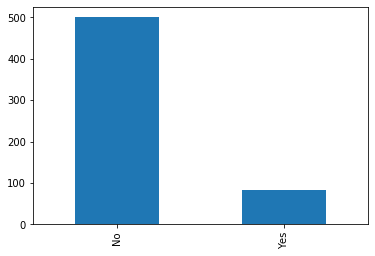

In [15]:
print(df['Self_Employed'].value_counts())
df['Self_Employed'].value_counts().plot.bar()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


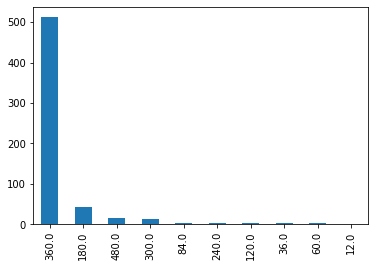

In [16]:
print(df['Loan_Amount_Term'].value_counts())
df['Loan_Amount_Term'].value_counts().plot.bar()

360.0    512
!=360    102
Name: Loan_Amount_Term, dtype: int64


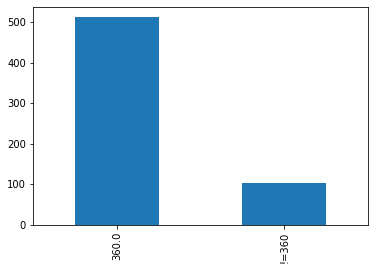

In [17]:
# if u see the above distribution it is towards the right so we can merge the data points
df.loc[df['Loan_Amount_Term']!= 360, 'Loan_Amount_Term']='!=360'
print(df['Loan_Amount_Term'].value_counts())
df['Loan_Amount_Term'].value_counts().plot.bar()

1.0    475
0.0     89
Name: Credit_History, dtype: int64


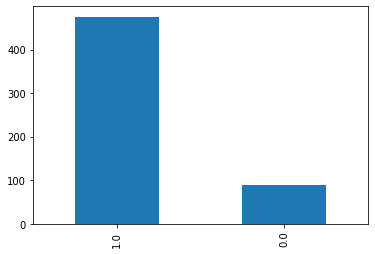

In [18]:
print(df['Credit_History'].value_counts())
df['Credit_History'].value_counts().plot.bar()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


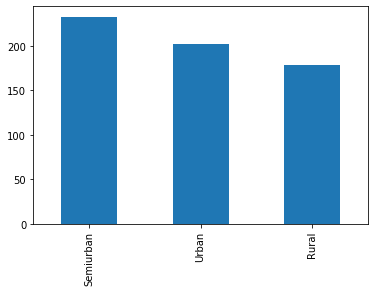

In [19]:
print(df['Property_Area'].value_counts())
df['Property_Area'].value_counts().plot.bar()

Y    422
N    192
Name: Loan_Status, dtype: int64


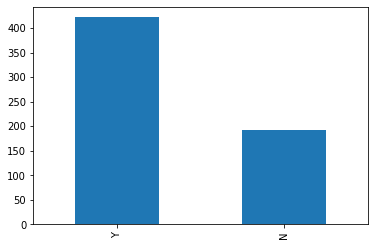

In [20]:
print(df['Loan_Status'].value_counts())
df['Loan_Status'].value_counts().plot.bar()

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

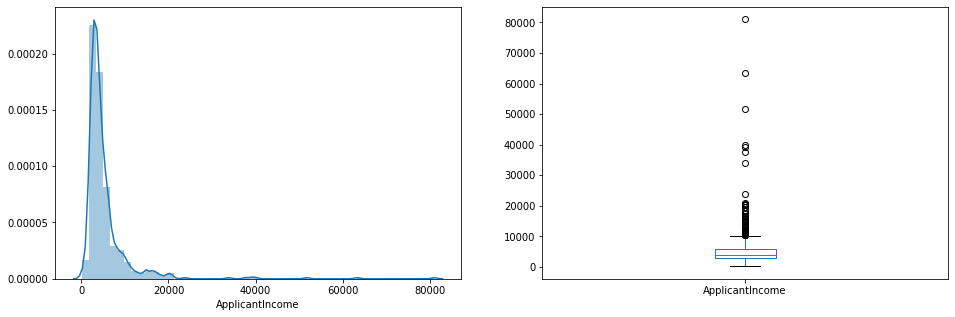

In [22]:
# Continuous Variable Distribution
# Now we will check for the Age Distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

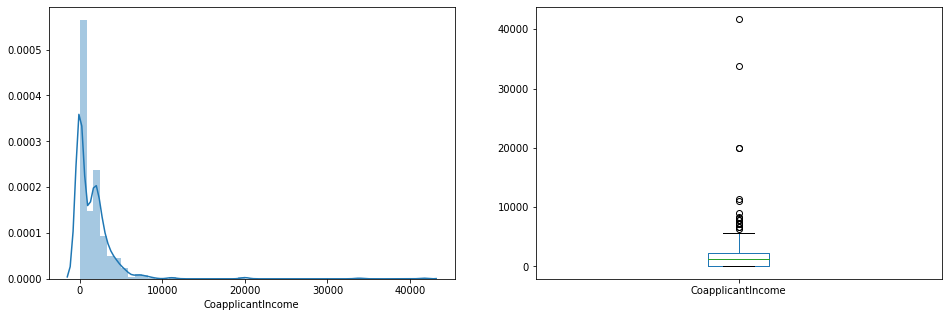

In [23]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

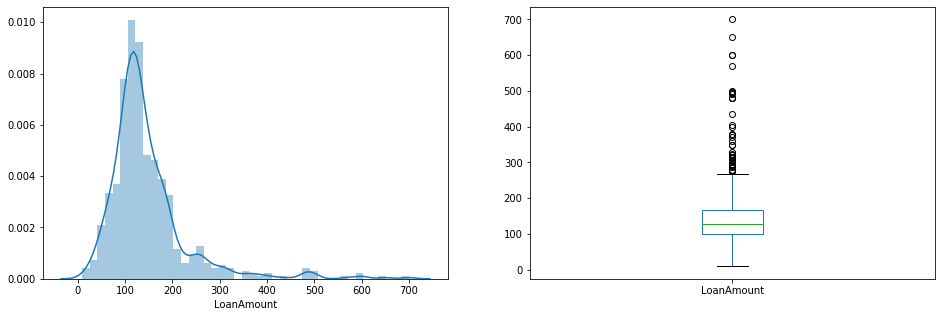

In [24]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

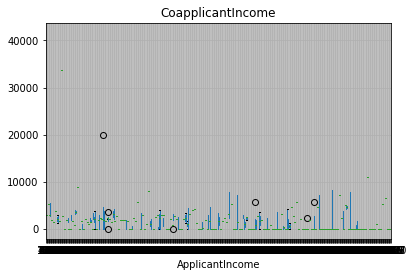

In [25]:
# Box Plot to check the Distribution of the continuous variables
df.boxplot(column='CoapplicantIncome', by='ApplicantIncome')
# To remove the upper title in box plot
plt.suptitle('')

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
Gender_Loan=pd.crosstab(df['Gender'], df['Loan_Status'])

In [28]:
Gender_Loan

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


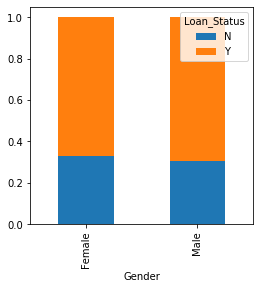

In [29]:
Gender_Loan=pd.crosstab(df['Gender'], df['Loan_Status'])
print(Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0))
Gender_Loan.div(Gender_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080


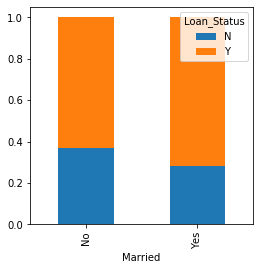

In [31]:
Married_Loan=pd.crosstab(df['Married'], df['Loan_Status'])
print(Married_Loan.div(Married_Loan.sum(axis=1).astype(float), axis=0))
Married_Loan.div(Married_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status         N         Y
Dependents                     
0            0.310145  0.689855
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059


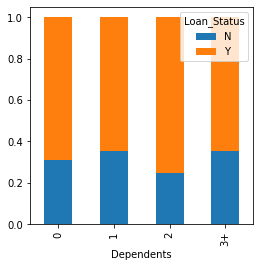

In [32]:
Dependents_Loan=pd.crosstab(df['Dependents'], df['Loan_Status'])
print(Dependents_Loan.div(Dependents_Loan.sum(axis=1).astype(float), axis=0))
Dependents_Loan.div(Dependents_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940


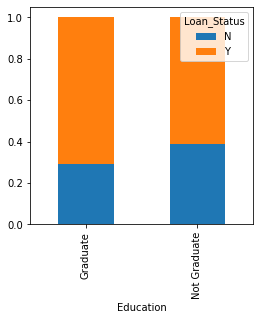

In [33]:
Education_Loan=pd.crosstab(df['Education'], df['Loan_Status'])
print(Education_Loan.div(Education_Loan.sum(axis=1).astype(float), axis=0))
Education_Loan.div(Education_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status           N         Y
Self_Employed                    
No             0.314000  0.686000
Yes            0.317073  0.682927


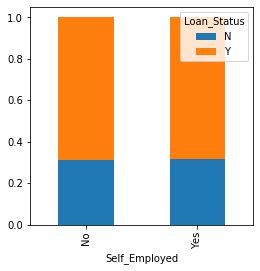

In [34]:
Self_Employed_Loan=pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(Self_Employed_Loan.div(Self_Employed_Loan.sum(axis=1).astype(float), axis=0))
Self_Employed_Loan.div(Self_Employed_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status              N         Y
Loan_Amount_Term                    
360.0             0.298828  0.701172
!=360             0.382353  0.617647


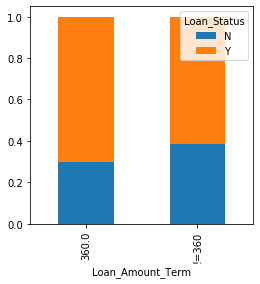

In [35]:
Loan_Amount_Term_Loan=pd.crosstab(df['Loan_Amount_Term'], df['Loan_Status'])
print(Loan_Amount_Term_Loan.div(Loan_Amount_Term_Loan.sum(axis=1).astype(float), axis=0))
Loan_Amount_Term_Loan.div(Loan_Amount_Term_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.204211  0.795789


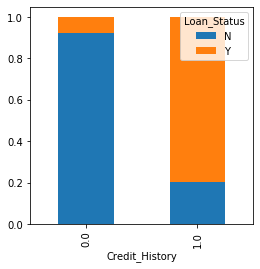

In [36]:
Credit_History_Loan=pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(Credit_History_Loan.div(Credit_History_Loan.sum(axis=1).astype(float), axis=0))
Credit_History_Loan.div(Credit_History_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416


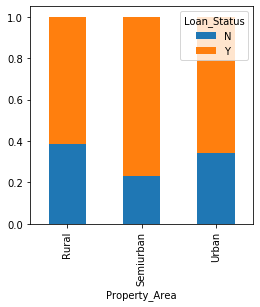

In [37]:
Property_Area_Loan=pd.crosstab(df['Property_Area'], df['Loan_Status'])
print(Property_Area_Loan.div(Property_Area_Loan.sum(axis=1).astype(float), axis=0))
Property_Area_Loan.div(Property_Area_Loan.sum(axis=1).astype(float), axis=0 ).plot(kind='bar', stacked=True, figsize=(4,4))

In [38]:
# By seeing the above graphs we can say that few variables have significant relationship with the dependent variable

In [39]:
df['Credit_History']=df['Credit_History'].astype(object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


# Now we will find the Missing values and impute them

In [41]:
for col in df.columns:
    missing=df[col][df[col].isna()== True]
    if missing.size>0:
        print(col, missing.size)

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Credit_History 50


In [42]:
print('Gender :' , df['Gender'].mode())
print('Married :', df['Married'].mode())
print('Dependents :', df['Dependents'].mode())
print('Self_Employed :', df['Self_Employed'].mode())
print('Credit_History :', df['Credit_History'].mode())
print('LoanAmount :' , df['LoanAmount'].mean())
print('LoanAmount :' , df['LoanAmount'].median())
print('LoanAmount :' , df['LoanAmount'].min())
print('LoanAmount :' , df['LoanAmount'].max())

Gender : 0    Male
dtype: object
Married : 0    Yes
dtype: object
Dependents : 0    0
dtype: object
Self_Employed : 0    No
dtype: object
Credit_History : 0    1
dtype: object
LoanAmount : 146.41216216216216
LoanAmount : 128.0
LoanAmount : 9.0
LoanAmount : 700.0


In [43]:
df.Gender.fillna('Male' , inplace=True)
df.Married.fillna('Yes' , inplace=True)
df.Dependents.fillna('0' , inplace=True)
df.Self_Employed.fillna('No' , inplace=True)
df.Credit_History.fillna('1' , inplace=True)
df.LoanAmount.fillna(128 , inplace=True)

In [44]:
for col in df.columns:
    missing=df[col][df[col].isna()== True]
    if missing.size>0:
        print(col, missing.size)

In [45]:
# final check for missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we are done with the missing values 

In [46]:
# Check for the out liers

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 62.5+ KB


In [48]:
print(np.percentile(df.loc[ :, 'ApplicantIncome'], [75,80,95,97,98,99,99.2,99.5,99.8,99.9]))
print(np.percentile(df.loc[: , 'ApplicantIncome'], [0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1.0]))

[ 5795.     6252.4   14583.    16682.25  19666.04  32540.41  37856.088
 39943.62  60721.276 70172.581]
[ 150.3678  153.678   256.556   382.834   519.508   646.885   664.662
  968.704  1012.925  1025.    ]


In [49]:
Q1=np.percentile(df.ApplicantIncome, 25)
Q3=np.percentile(df.ApplicantIncome, 75)

IQR=Q3-Q1

Lower=Q1-(1.5*IQR)
Upper=Q3+(1.5*IQR)

print('Q1:' ,Q1)
print('Q3:' ,Q3)
print('IQR:', IQR)
print('Lower: ' ,Lower)
print('Upper :', Upper)

#df[df['ApplicantIncome']>Upper]

Q1: 2877.5
Q3: 5795.0
IQR: 2917.5
Lower:  -1498.75
Upper : 10171.25


In [50]:
print(np.percentile(df.loc[ :, 'CoapplicantIncome'], [75,80,95,97,98,99,99.2,99.5,99.8,99.9]))
print(np.percentile(df.loc[: , 'CoapplicantIncome'], [0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1.0, 2, 5, 10, 44, 45, 50]))

[ 2297.25   2535.     4997.4    5682.67   7198.56   8895.89  10999.872
 19434.5   30709.838 36867.21 ]
[   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.   241.7 1188.5]


In [51]:
Q1=np.percentile(df.CoapplicantIncome, 25)
Q3=np.percentile(df.CoapplicantIncome, 75)

IQR=Q3-Q1

Lower=Q1-(1.5*IQR)
Upper=Q3+(1.5*IQR)

print('Q1:' ,Q1)
print('Q3:' ,Q3)
print('IQR:', IQR)
print('Lower: ' ,Lower)
print('Upper :', Upper)

Q1: 0.0
Q3: 2297.25
IQR: 2297.25
Lower:  -3445.875
Upper : 5743.125


In [52]:
print(np.percentile(df.loc[ :, 'LoanAmount'], [75,80,95,97,98,99,99.2,99.5,99.8,99.9]))
print(np.percentile(df.loc[: , 'LoanAmount'], [0.001,0.01,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1.0]))

[164.75 180.   293.4  356.1  427.94 495.87 506.72 598.05 638.7  669.35]
[ 9.04904  9.4904  18.808   23.712   25.      25.065   25.678   29.616
 30.      30.65   ]


In [53]:
Q1=np.percentile(df.LoanAmount, 25)
Q3=np.percentile(df.LoanAmount, 75)

IQR=Q3-Q1

Lower=Q1-(1.5*IQR)
Upper=Q3+(1.5*IQR)

print('Q1:' ,Q1)
print('Q3:' ,Q3)
print('IQR:', IQR)
print('Lower: ' ,Lower)
print('Upper :', Upper)

Q1: 100.25
Q3: 164.75
IQR: 64.5
Lower:  3.5
Upper : 261.5


# Outlier Correction

In [54]:
df.loc[df['ApplicantIncome']> 10171.25 ,'ApplicantIncome']= 10171.25
df.loc[df['ApplicantIncome']==0 ,'ApplicantIncome']= 0.001

df.loc[df['CoapplicantIncome']> 5743 ,'CoapplicantIncome']=5743
df.loc[df['CoapplicantIncome']==0 ,'CoapplicantIncome']=0.001

df.loc[df['LoanAmount']>261.5 ,'LoanAmount']=261.5
df.loc[df['LoanAmount']==0 ,'LoanAmount']=0.001

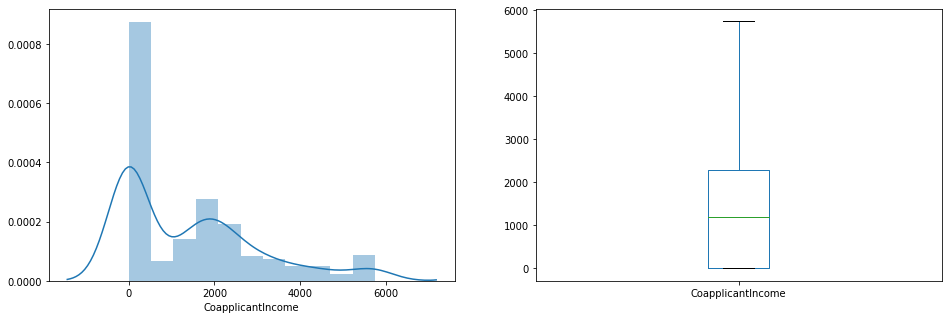

In [55]:
# Just checking the distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    object 
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), object(10)
memory usage: 62.5+ KB


In [57]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Dummy Variable Creation

In [58]:
dummy_col=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 
             'Credit_History', 'Property_Area']
df_dummies=pd.get_dummies(df[dummy_col] , drop_first=True)

In [59]:
df_dummies.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_!=360,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,1,1,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,1


In [60]:
df_dummies.shape

(614, 12)

In [61]:
type(df_dummies)

pandas.core.frame.DataFrame

In [62]:
df['ApplicantIncome']=df['ApplicantIncome'].apply(np.int64)
df['CoapplicantIncome']=df['CoapplicantIncome'].apply(np.int64)
df['LoanAmount']=df['LoanAmount'].apply(np.int64)

In [63]:
num_col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [64]:
df_num=df[num_col]

In [65]:
type(num_col)

list

In [66]:
num_col=pd.DataFrame(num_col)
type(num_col)

pandas.core.frame.DataFrame

In [67]:
print(df_num.head())
print(df_num.shape)

   ApplicantIncome  CoapplicantIncome  LoanAmount
0             5849                  0         128
1             4583               1508         128
2             3000                  0          66
3             2583               2358         120
4             6000                  0         141
(614, 3)


In [68]:
Loan_Status=df.Loan_Status.apply(lambda x: 0 if x=='N' else 1)

In [69]:
type(Loan_Status)

pandas.core.series.Series

In [70]:
print(Loan_Status.head())
print(Loan_Status.shape)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64
(614,)


In [71]:
df_train=pd.concat([df_dummies, df_num, Loan_Status] , axis=1)

In [72]:
df_train.isnull().sum()

Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Loan_Amount_Term_!=360     0
Credit_History_1.0         0
Credit_History_1           0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Status                0
dtype: int64

In [73]:
df_train.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_!=360,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,1,0,0,0,0,0,0,0,1,0,0,1,5849,0,128,1
1,1,1,1,0,0,0,0,0,1,0,0,0,4583,1508,128,0
2,1,1,0,0,0,0,1,0,1,0,0,1,3000,0,66,1
3,1,1,0,0,0,1,0,0,1,0,0,1,2583,2358,120,1
4,1,0,0,0,0,0,0,0,1,0,0,1,6000,0,141,1


# Scatter plot numerical variables

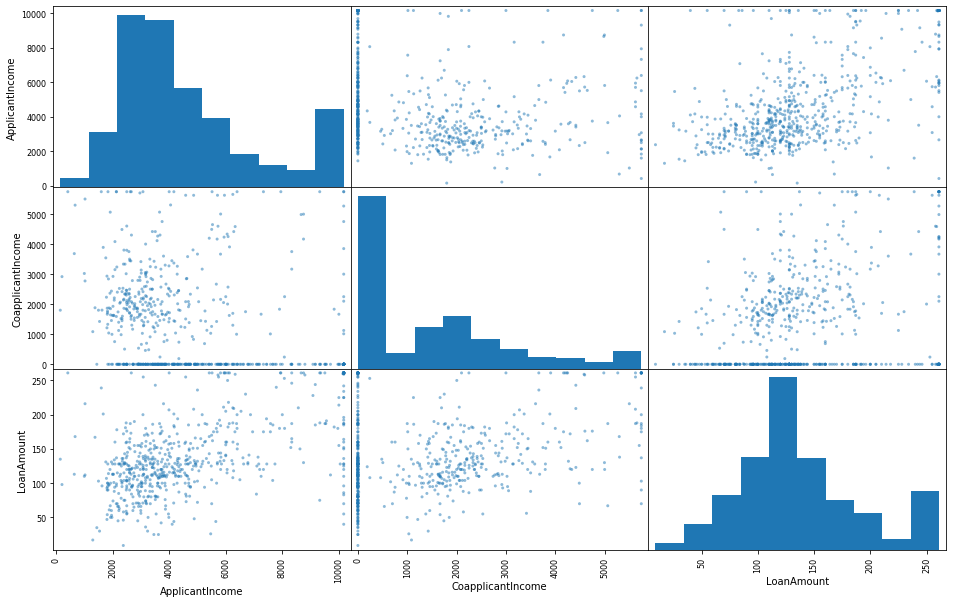

In [74]:
pd.plotting.scatter_matrix(df_num, figsize=(16,10))
plt.show()

In [75]:
corr=df_num.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.228957,0.557763
CoapplicantIncome,-0.228957,1.000000,0.265056
LoanAmount,0.557763,0.265056,1.000000


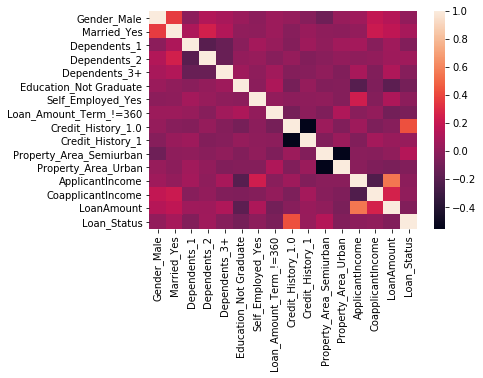

In [76]:
sns.heatmap(df_train.corr())

In [77]:
df_train.describe()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_!=360,Credit_History_1.0,Credit_History_1,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.166124,0.773616,0.081433,0.379479,0.328990,4617.091205,1419.697068,137.332248,0.687296
std,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.372495,0.418832,0.273722,0.485653,0.470229,2479.806058,1624.596642,55.705416,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10171.000000,5743.000000,261.000000,1.000000


In [78]:
df_train['Loan_Status']=df_train['Loan_Status'].astype(int)

# Train test split

In [79]:
type(df_train['Loan_Status'])

pandas.core.series.Series

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Male              614 non-null    uint8
 1   Married_Yes              614 non-null    uint8
 2   Dependents_1             614 non-null    uint8
 3   Dependents_2             614 non-null    uint8
 4   Dependents_3+            614 non-null    uint8
 5   Education_Not Graduate   614 non-null    uint8
 6   Self_Employed_Yes        614 non-null    uint8
 7   Loan_Amount_Term_!=360   614 non-null    uint8
 8   Credit_History_1.0       614 non-null    uint8
 9   Credit_History_1         614 non-null    uint8
 10  Property_Area_Semiurban  614 non-null    uint8
 11  Property_Area_Urban      614 non-null    uint8
 12  ApplicantIncome          614 non-null    int64
 13  CoapplicantIncome        614 non-null    int64
 14  LoanAmount               614 non-null    int64
 15  Loan_S

In [81]:
from sklearn.model_selection import train_test_split
columns=df_train.drop('Loan_Status', axis=1).columns
X_train, X_test, y_train, y_test= train_test_split(df_train[columns], df_train.Loan_Status, test_size=0.2)

# Model parameter tuning and selection

In [82]:
model_score=[]

In [83]:
# First we are working on Random Forest to find out the significat variables
# Import the required packages and librauries

# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [85]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6]},
             {'n_estimators': [5, 10, 15]},
            {'max_features': ['auto', 'sqrt', 'log2']}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,criterion='entropy',class_weight='balanced')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(X_train, y_train)  
print(RF_GS.best_params_)

{'max_features': 'auto'}


In [86]:
RF_GS.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=123)

In [87]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_features': ['auto', 'sqrt', 'log2']}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,criterion='entropy',class_weight='balanced')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(X_train, y_train)  
print(RF_GS.best_params_)

{'max_features': 'auto'}


In [88]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[2,3,4,6]}]

scorer={'recall_score': make_scorer(recall_score)}

RF = RandomForestClassifier(random_state = 123,criterion='entropy',class_weight='balanced')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='recall_score',cv=3,n_jobs=-1)
RF_GS.fit(X_train, y_train)  
print(RF_GS.best_params_)

{'max_depth': 6}


In [89]:
RF_1= RandomForestClassifier(random_state=123, n_estimators=15, criterion='entropy', class_weight='balanced', max_depth=6, max_features='auto')
RF_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, n_estimators=15, random_state=123)

In [90]:
y_pred_RF_1=RF_1.predict(X_test)
metrics.recall_score(y_test, y_pred_RF_1)

0.9012345679012346

In [91]:
model_score.append(metrics.recall_score(y_test, y_pred_RF_1))

In [92]:
#accuracy on train data
X_train_pred_RF_1=RF_1.predict(X_train)
metrics.recall_score(y_train, X_train_pred_RF_1)

0.9530791788856305

In [93]:
var_imp_RF_1=pd.Series(data=RF_1.feature_importances_, index=X_train.columns, name='variables')
print(var_imp_RF_1)

Gender_Male                0.023713
Married_Yes                0.034988
Dependents_1               0.029924
Dependents_2               0.037365
Dependents_3+              0.018735
Education_Not Graduate     0.021607
Self_Employed_Yes          0.019517
Loan_Amount_Term_!=360     0.024380
Credit_History_1.0         0.259997
Credit_History_1           0.079190
Property_Area_Semiurban    0.057941
Property_Area_Urban        0.013081
ApplicantIncome            0.171193
CoapplicantIncome          0.082076
LoanAmount                 0.126292
Name: variables, dtype: float64


If you obseve the above values above are having more significance, so we can finalise this

In [94]:
var_imp_RF_1.to_csv('imp_var.csv')

# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
GS=DecisionTreeClassifier(random_state=123, class_weight='balanced', max_features='sqrt')

In [96]:
param_grid=[{'max_depth':[2,3,4,5,6,7,8,9,10]}]
scorer={'recall_score': make_scorer(recall_score)}

DT_GS=GridSearchCV(GS, param_grid=param_grid, scoring=scorer, refit='recall_score', cv=5)
DT_GS_1=DT_GS.fit(X_train, y_train)
DT_GS_1.best_score_
DT_GS_1.best_params_

{'max_depth': 2}

In [97]:
DT_1=DecisionTreeClassifier(random_state=123, max_depth=2, class_weight='balanced', max_features='sqrt')
DT_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       max_features='sqrt', random_state=123)

In [98]:
y_pred_DT_1=DT_1.predict(X_test)
metrics.recall_score(y_test, y_pred_DT_1 )

1.0

In [99]:
model_score.append({'Decision Tree:', metrics.recall_score(y_test, y_pred_DT_1 )})

In [100]:
#Lets check the train data accuracy
x_pred_DT_1=DT_1.predict(X_train)
metrics.recall_score(y_train, x_pred_DT_1)

0.9794721407624634

In [101]:
model_score

[0.9012345679012346, {1.0, 'Decision Tree:'}]

# Logistic Regression

In [102]:
# Before getting into Logistic Regression we need to check for the Multi Collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range (X_train.shape[1]):
    temp_vif=variance_inflation_factor(X_train.values, i)
    print(X_train.columns[i], ": ", temp_vif)

Gender_Male :  6.170920197909164
Married_Yes :  3.88413730263271
Dependents_1 :  1.352035363455539
Dependents_2 :  1.4378895980957354
Dependents_3+ :  1.2682075468198766
Education_Not Graduate :  1.3224189039676006
Self_Employed_Yes :  1.250372204684063
Loan_Amount_Term_!=360 :  1.2628861614752442
Credit_History_1.0 :  4.47583928443601
Credit_History_1 :  1.428138933613478
Property_Area_Semiurban :  2.060939583070804
Property_Area_Urban :  1.9819836498078873
ApplicantIncome :  9.150683928172874
CoapplicantIncome :  2.665252140042232
LoanAmount :  13.14935696898103


If we check the vif , mostly all are less than 10 except loan amount . So we perform the operation

In [103]:
from sklearn.linear_model import LogisticRegression

Log_Reg=LogisticRegression(class_weight='balanced')
Log_Reg_1=Log_Reg.fit(X_train, y_train)

C:\Users\91963\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
y_pred_Log_Reg=Log_Reg_1.predict(X_test)
metrics.recall_score(y_test, y_pred_Log_Reg )

0.8641975308641975

In [105]:
model_score.append({'Logistic Regression :' , metrics.recall_score(y_test, y_pred_Log_Reg) })

In [106]:
y_pred_Log_train=Log_Reg_1.predict(X_train)
metrics.recall_score(y_train, y_pred_Log_train)

0.8123167155425219

In [107]:
model_score

[0.9012345679012346,
 {1.0, 'Decision Tree:'},
 {0.8641975308641975, 'Logistic Regression :'}]

In [108]:
con_mat_LG=confusion_matrix(y_test, y_pred_Log_Reg)
con_mat_LG

array([[20, 22],
       [11, 70]], dtype=int64)

In [109]:
# Now we will see the the results by changing the cut offs
y_test_pred_prob=Log_Reg_1.predict_proba(X_test) [:, 1]
y_test_pred_prob

array([0.83097168, 0.13616003, 0.58751968, 0.80480572, 0.41986371,
       0.83347034, 0.85103805, 0.64477751, 0.12656017, 0.08457735,
       0.70702173, 0.80243446, 0.54137008, 0.8154384 , 0.5678305 ,
       0.56700412, 0.55034521, 0.62188624, 0.7056283 , 0.41164627,
       0.53468477, 0.80062948, 0.50844273, 0.8090544 , 0.52081331,
       0.60001016, 0.45338104, 0.57193755, 0.54294175, 0.15024371,
       0.60151983, 0.79807153, 0.83060907, 0.70562026, 0.69285916,
       0.8627363 , 0.59874307, 0.04961176, 0.56549159, 0.61775923,
       0.1076873 , 0.39102711, 0.33209352, 0.79587657, 0.71005426,
       0.63985129, 0.61565836, 0.63950566, 0.83237183, 0.62518772,
       0.54717354, 0.79569546, 0.66217009, 0.88693815, 0.81655832,
       0.1507809 , 0.8199952 , 0.80136298, 0.34280193, 0.75282831,
       0.89326868, 0.78809741, 0.31363774, 0.38261323, 0.53119347,
       0.31774871, 0.32785644, 0.58863512, 0.10017703, 0.13654849,
       0.51523215, 0.71184063, 0.82729292, 0.09740666, 0.31612

Text(0, 0.5, 'Frequency')

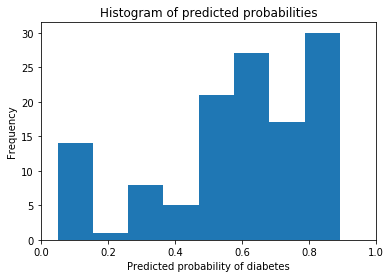

In [110]:
# Check the probabilities in the graph
# 8 bins
plt.hist(y_test_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

If you obseve the above probabilities it is skewed, 
So we can change the cut off to 0.6

In [111]:
from sklearn.preprocessing import binarize

y_pred_Log_Reg_1_class_new= binarize(np.atleast_2d(y_test_pred_prob), 0.6) [0]

C:\Users\91963\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [112]:
y_pred_Log_Reg_1_class_new[0:10]

array([1., 0., 0., 1., 0., 1., 1., 1., 0., 0.])

In [113]:
Log_Reg_1.predict(X_test)[0:10]

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [114]:
print(metrics.recall_score(y_test, y_pred_Log_Reg_1_class_new))

0.6666666666666666


# ROC cureve

In [115]:
y_test.head()

102    1
22     0
366    0
484    1
330    1
Name: Loan_Status, dtype: int32

In [116]:
y_test_pred_prob[0:10]

array([0.83097168, 0.13616003, 0.58751968, 0.80480572, 0.41986371,
       0.83347034, 0.85103805, 0.64477751, 0.12656017, 0.08457735])

In [117]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob)

In [118]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_test_pred_prob)

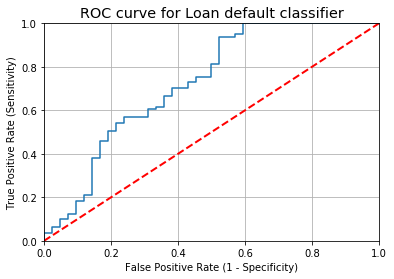

In [119]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('ROC curve for Loan default classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [120]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [121]:
evaluate_threshold(0.6)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 44 but corresponding boolean dimension is 106

In [122]:
# AUC is the percentage of the ROC plot that is underneath the curve
# AUC is useful as a single number summary of classifier performance
# Higher value = better classifier
# AUC is useful even when there is high class imbalance (unlike classification accuracy)

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_test_pred_prob))

0.7257495590828924


In [123]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(RF_1, X_train, y_train, cv=10, scoring='roc_auc').mean()

In [124]:
cross_val

0.7363725490196079

In [125]:
# calculate cross-validated AUC
scorer={'recall_score': make_scorer(recall_score)}

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(RF_1, X_train, y_train, cv=10, scoring=scorer).mean()

ValueError: For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. {'recall_score': make_scorer(recall_score)} was passed.

In [126]:
f1 = metrics.f1_score(y_test, y_pred_Log_Reg)
print(f1)

0.8092485549132948


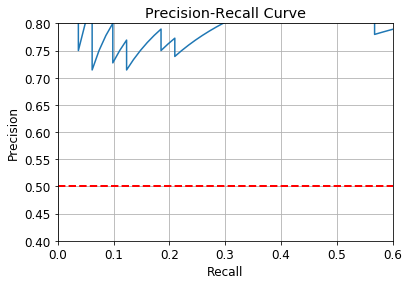

In [127]:
plt.plot(recall, precision)
plt.xlim([0.0, 0.6])
plt.ylim([0.4, 0.8])
plt.rcParams['font.size'] = 12
##Random FPR and TPR
plt.plot([0, 1], [0.5, 0.5], color='red', lw=2, linestyle='--')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [128]:
model_score

[0.9012345679012346,
 {1.0, 'Decision Tree:'},
 {0.8641975308641975, 'Logistic Regression :'}]

So we can finalize Random Forest model since it is giving good accuracy